In [1]:
%matplotlib inline
import csv
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

/Users/gaurang/Code/spring16/ABDA/venv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
dates = []
open_prices = []

def get_data(filename):
    with open(filename, 'r') as csvfile:
        csv_fr = csv.reader(csvfile)
        next(csv_fr) # skip the first row, which has all the column names
        for row in csv_fr:
            dates.append(int(row[0].split('-')[0]))
            open_prices.append(float(row[1]))
    return

This is the most basic kind of linear regression model. It predicts the market opening price as a function of the date, by fitting a line to the previous opening prices.  
The data used is opening price data for 1 month.  

This model does not take any other features into account, it just fits a line to the previous opening prices.  
Seeing the error of this most basic baseline model, we can make improvements.

In [11]:
get_data('goog.csv')

In [12]:
dates

[26, 25, 24, 23, 22, 19, 18, 17, 16, 12, 11, 10, 9, 8, 5, 4, 3, 2, 1]

In [13]:
linear_mod = linear_model.LinearRegression()

dates = np.reshape(dates, (len(dates), 1))

open_prices = np.reshape(open_prices, (len(open_prices), 1))

linear_mod.fit(dates, open_prices)

/Users/gaurang/Code/spring16/ABDA/venv/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
predict_price = linear_mod.predict(29)
predict_price

array([[ 680.9255198]])

In [15]:
linear_mod.intercept_

array([ 728.93081909])

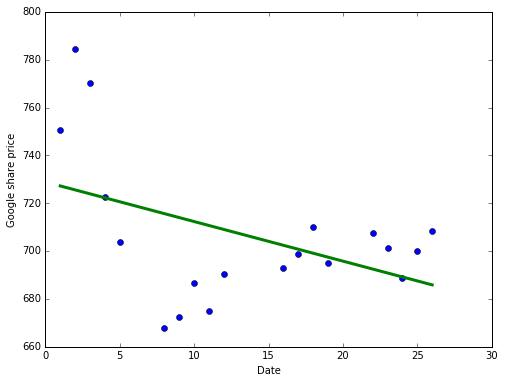

In [17]:
figure, ax = plt.subplots(figsize=(8,6))
ax.plot(dates, open_prices,'o')
ax.plot(dates, linear_mod.predict(dates), linewidth=3)
plt.xlabel('Date')
plt.ylabel('Google share price')

## Fitting a more complicated regression model:
Features: High, Low, Close, Volume  
Target: Open Price

In [27]:
def get_data(filename):
    with open(filename, 'r') as csvfile:
        csv_fr = csv.reader(csvfile)
        next(csv_fr) # skip the first row, which has all the column names
        data = []
        open_prices = []
        for row in csv_fr:
            row_date = int(row[0].split('-')[0])
            open_price = float(row[1])
            high = float(row[2])
            low = float(row[3])
            close= float(row[4])
            volume = int(row[5])
            datapoint = [row_date, high, low, close, volume]
            data.append(datapoint)
            open_prices.append(open_price)
        return data, open_prices

In [28]:
filename = './stock_hourly_data/AAPL.csv'
data, open_prices = get_data(filename)

In [29]:
data[0]

[9, 101.58, 100.27, 101.12, 27130729]

In [30]:
# format the data
predict_on = data[0]
# data_predict_on = predict_on[0]
predict_on = predict_on[1:]
data = data[1:]
open_prices = open_prices[:-1]
reg_data = np.array(data)
dates = reg_data[:, 0]
reg_data = reg_data[:, 1:]
prices = np.reshape(open_prices, len(open_prices), 1)

In [31]:
predict_on

[101.58, 100.27, 101.12, 27130729]

In [32]:
# fit a linear regression
linear_mod = linear_model.LinearRegression()
linear_mod.fit(reg_data, prices)
predict_price = linear_mod.predict(predict_on)

/Users/gaurang/Code/spring16/ABDA/venv/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [33]:
predict_price

array([ 100.99181839])

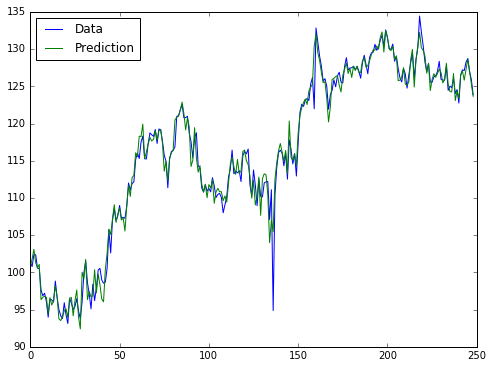

In [34]:
figure, ax = plt.subplots(figsize=(8,6))
ax.plot(range(len(prices)),  prices, 'b-', label='Data')
ax.plot(range(len(prices)), linear_mod.predict(reg_data), 'g-', label='Prediction')
ax.legend(loc='best')

In [35]:
predicted_prices = linear_mod.predict(reg_data)

In [38]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(prices, predicted_prices)

In [39]:
mse

2.0494311771331981

In [13]:
linear_mod.coef_

array([  2.01203794e-01,  -4.22417927e-01,   1.22626839e+00,
        -1.01903748e-08])

As the coefficients tell us, Volume of shares traded has very less effect on the price in its raw form.
Maybe a difference in volume from day to day will work better